# Machine Learning

## Introducción a Redes Neuronales

### Librerias

In [1]:
#Evitar warnings
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
#0 = all messages are logged (default behavior)
#1 = INFO messages are not printed
#2 = INFO and WARNING messages are not printed
#3 = INFO, WARNING, and ERROR messages are not printed

In [2]:
#Data Analysis
import pandas as pd

#Plotting
import matplotlib.pyplot as plt

#Neural Network Architecture
import tensorflow as tf

#Metrics
from sklearn.metrics import classification_report, confusion_matrix

#Utils
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

### Carga de datos

Información sobre el conjunto de datos

Esta base de datos contiene 76 atributos, pero todos los experimentos publicados hacen referencia al uso de un subconjunto de 14 de ellos.  En concreto, la base de datos Cleveland es la única que han utilizado los investigadores de ML hasta la fecha.  El campo "meta" se refiere a la presencia de cardiopatía en el paciente.  Tiene un valor entero de 0 (sin presencia) a 4. Los experimentos con la base de datos Cleveland se han centrado simplemente en intentar distinguir la presencia (valores 1,2,3,4) de la ausencia (valor 0).  
   
Recientemente se han eliminado de la base de datos los nombres y números de la seguridad social de los pacientes, sustituyéndolos por valores ficticios.

Se ha "procesado" un fichero, el que contiene la base de datos de Cleveland.  Los cuatro ficheros no procesados también existen en este directorio.

Para conocer más sobre el dataset pueden ver los siguientes links:

* https://github.com/uci-ml-repo/ucimlrepo

* https://archive.ics.uci.edu/dataset/45/heart+disease

* https://pubmed.ncbi.nlm.nih.gov/2756873/

In [3]:
df = pd.read_csv('./Data/data.csv') #

In [4]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


| Variable Name | Role     | Type         | Demographic | Description                                      | Units  | Missing Values |
|---------------|----------|--------------|-------------|--------------------------------------------------|--------|----------------|
| age           | Feature  | Integer      | Age         |                                                  | years  | no             |
| sex           | Feature  | Categorical  | Sex         |                                                  |        | no             |
| cp            | Feature  | Categorical  |             |                                                  |        | no             |
| trestbps      | Feature  | Integer      |             | resting blood pressure (on admission to the hospital) | mm Hg | no             |
| chol          | Feature  | Integer      |             | serum cholestoral                                | mg/dl  | no             |
| fbs           | Feature  | Categorical  |             | fasting blood sugar > 120 mg/dl                  |        | no             |
| restecg       | Feature  | Categorical  |             |                                                  |        | no             |
| thalach       | Feature  | Integer      |             | maximum heart rate achieved                      |        | no             |
| exang         | Feature  | Categorical  |             | exercise induced angina                          |        | no             |
| oldpeak       | Feature  | Integer      |             | ST depression induced by exercise relative to rest |        | no             |


### Análisis exploratorio

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [6]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

In [7]:
df[df.columns[:13]].describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


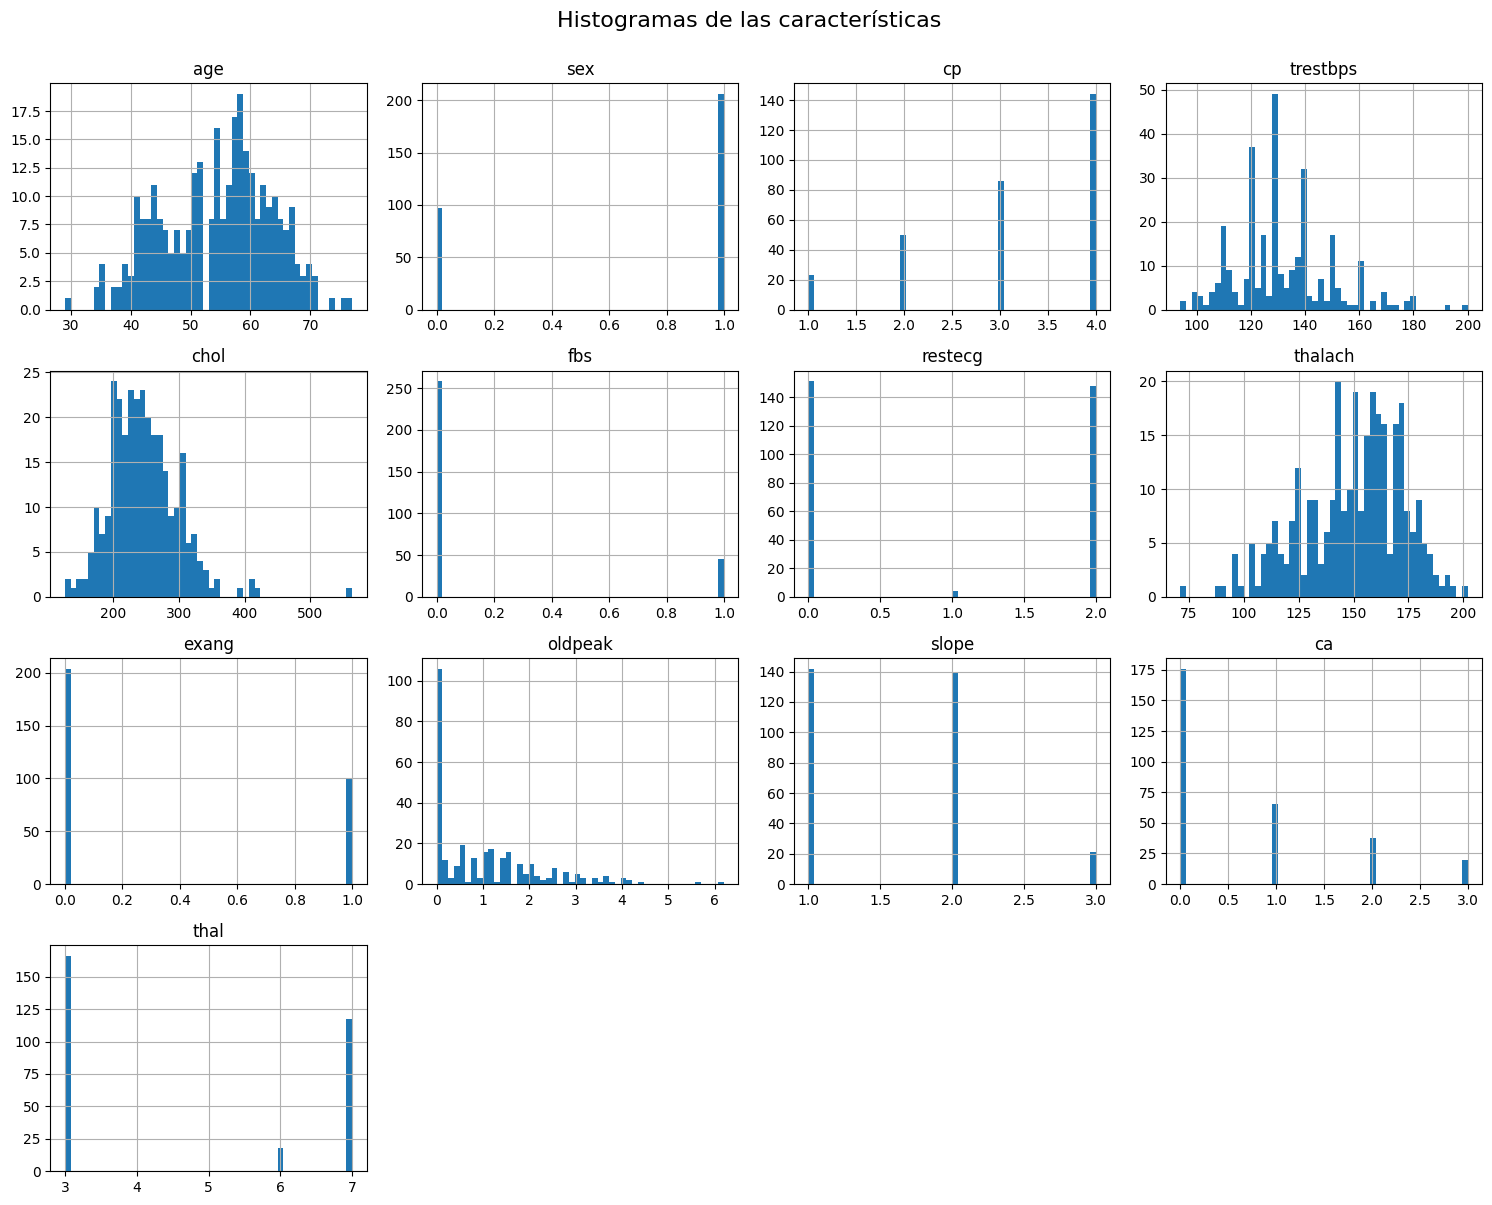

In [8]:
df[df.columns[:13]].hist(bins=50, figsize=(15, 12), layout=(4, 4))
plt.suptitle("Histogramas de las características", y=1, fontsize=16)
plt.tight_layout()
plt.show()

In [9]:
df['num'].value_counts()

num
0    164
1     55
2     36
3     35
4     13
Name: count, dtype: int64

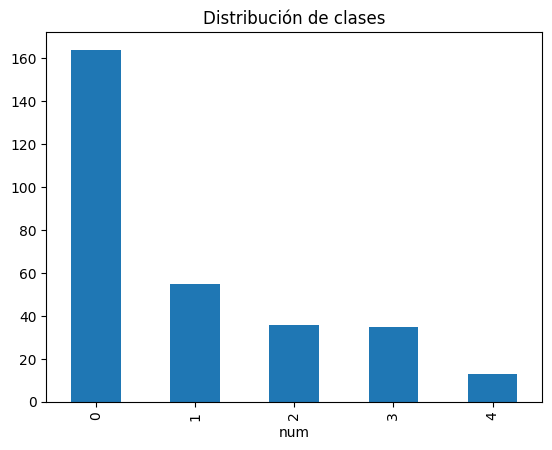

In [10]:
df['num'].value_counts().plot(kind='bar')
plt.title('Distribución de clases')
plt.show()

Transformaremos el problema en binario, considerando 0 como ausencia de enfermedad coronaria, y 1 como presencia de enfermedad. No solo para simplificar el problema (ya que es introductorio), sino para que las clases estén más balanceadas.

In [11]:
df_binary = df.copy()

In [12]:
df_binary['num'] = df_binary['num'].apply(lambda x: 1 if x>0 else 0)

In [13]:
df_binary['num'].value_counts() 

num
0    164
1    139
Name: count, dtype: int64

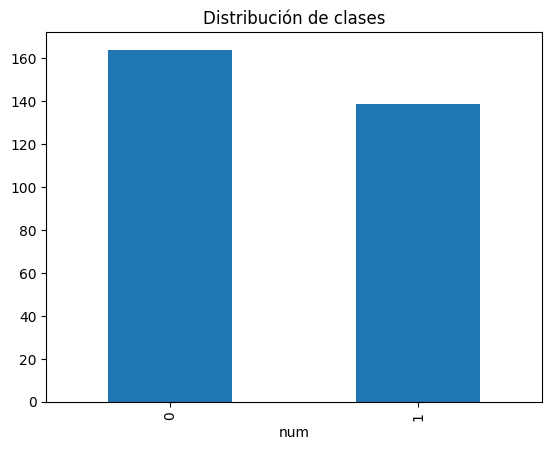

In [14]:
df_binary['num'].value_counts().plot(kind='bar')
plt.title('Distribución de clases')
plt.show()

Como podemos ver están mejor distribuidas.

Eliminaremos los registros con valores nulos ya que son muy pocos.

In [15]:
df_binary = df_binary.dropna()

In [16]:
X = df_binary[df_binary.columns[:13]]
Y = df_binary['num']

Separamos en conjunto de entrenamiento y prueba

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

### Arquitectura de la red Neuronal

In [18]:
# Escalado de datos
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
X_train.shape

(237, 13)

In [20]:
# Construcción del modelo
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],), name='input_layer'),
    tf.keras.layers.Dense(32, activation='relu', name='hidden_layer_1'),
    tf.keras.layers.Dense(16, activation='relu', name='input_layer_2'),
    tf.keras.layers.Dense(1, activation='sigmoid', name='output_layer')
])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 16)                224       
                                                                 
 hidden_layer_1 (Dense)      (None, 32)                544       
                                                                 
 input_layer_2 (Dense)       (None, 16)                528       
                                                                 
 output_layer (Dense)        (None, 1)                 17        
                                                                 
Total params: 1313 (5.13 KB)
Trainable params: 1313 (5.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
# Compilación del modelo
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(),
            ])

In [23]:
# Entrenamiento del modelo
history = model.fit(X_train, y_train, epochs=25, batch_size=1, validation_split=0.1, verbose=1)

Epoch 1/25


I0000 00:00:1705363484.170075 2512325 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


213/213 [==============================] - 2s 4ms/step - loss: 0.6894 - binary_accuracy: 0.5915 - val_loss: 0.6816 - val_binary_accuracy: 0.7083
Epoch 2/25
213/213 [==============================] - 1s 3ms/step - loss: 0.6880 - binary_accuracy: 0.6150 - val_loss: 0.6821 - val_binary_accuracy: 0.7083
Epoch 3/25
213/213 [==============================] - 1s 3ms/step - loss: 0.6867 - binary_accuracy: 0.6244 - val_loss: 0.6822 - val_binary_accuracy: 0.7500
Epoch 4/25
213/213 [==============================] - 1s 3ms/step - loss: 0.6853 - binary_accuracy: 0.6291 - val_loss: 0.6820 - val_binary_accuracy: 0.7500
Epoch 5/25
213/213 [==============================] - 1s 3ms/step - loss: 0.6839 - binary_accuracy: 0.6385 - val_loss: 0.6816 - val_binary_accuracy: 0.7083
Epoch 6/25
213/213 [==============================] - 1s 3ms/step - loss: 0.6825 - binary_accuracy: 0.6667 - val_loss: 0.6814 - val_binary_accuracy: 0.6667
Epoch 7/25
213/213 [==============================] - 1s 3ms/step - loss: 0

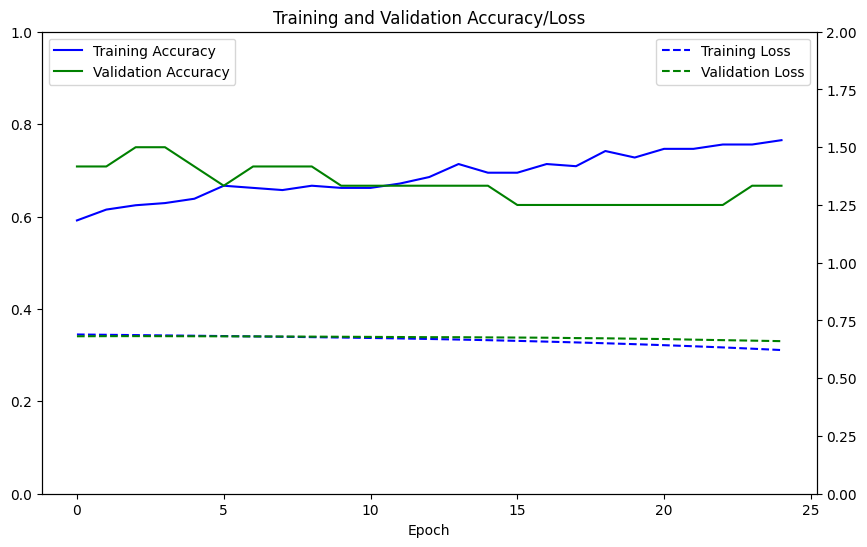

In [24]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting Accuracy on the primary y-axis
ax1.plot(history.history['binary_accuracy'], label='Training Accuracy', color='blue')
ax1.plot(history.history['val_binary_accuracy'], label='Validation Accuracy', color='green')
ax1.set_xlabel('Epoch')
ax1.set_ylim([0, 1])
ax1.legend(loc='upper left')

# Creating a secondary y-axis for Loss
ax2 = ax1.twinx()
ax2.plot(history.history['loss'], label='Training Loss', color='blue', linestyle='--')
ax2.plot(history.history['val_loss'], label='Validation Loss', color='green', linestyle='--')
ax2.set_ylim([0, 2])
ax2.legend(loc='upper right')

plt.title('Training and Validation Accuracy/Loss')
plt.show()


In [25]:
# Evaluación del modelo en datos de prueba
eval_results = model.evaluate(X_test, y_test, verbose=2)
print(f"\nTest Loss: {eval_results[0]}, Test Accuracy: {eval_results[1]}")

2/2 - 0s - loss: 0.6276 - binary_accuracy: 0.7833 - 241ms/epoch - 121ms/step

Test Loss: 0.627555787563324, Test Accuracy: 0.7833333611488342


In [26]:
# Predicción
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

2/2 [==============================] - 0s 3ms/step


In [27]:
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.72      0.80        36
           1       0.68      0.88      0.76        24

    accuracy                           0.78        60
   macro avg       0.79      0.80      0.78        60
weighted avg       0.81      0.78      0.79        60



In [28]:
# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[26 10]
 [ 3 21]]


Ejercicios:

* Podemos ver que el modelo no clasifica correctamente. Aunque no lo hace tan mal, aceptarían este modelo? **Qué puede estar pasando si observan el gráfico de entrenamiento y validación?**

* Investigar sobre las funciones de activación (ReLU, Sigmoid, etc.). Conocer sus funcionalidades, fortalezas y debilidades. **Por qué las necesitamos en general?**

* Mejorar el modelo, si es posible. Explorar con diferentess optimizadores, batch sizes, capas, activaciones, etc. Manipular hiperparámetros para obtener mejores resultados. **Es necesario incluir todas las características en el modelo?**

* Por otro lado, la función **XOR** es linealmente separable?

Links de Referencia:

* Tensorflow Docs: https://www.tensorflow.org/

Links de interés:

* Neural Network PlayGround: https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.99698&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false

![Lenguaje Matemático](./Images/Matematicas.png)

![Contacto](./Images/Contacto.png)